In [1]:
#%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import Dependencies. 
import numpy as np
import pandas as pd
from collections import defaultdict

In [3]:
import datetime as dt
#import datetime
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.inspection import inspect
from sqlalchemy import desc

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
#start date = 05/26/2017
#end date = 6/3/2018
st_date_str = "2017-08-31" 
print(type(st_date_str))
st_date = dt.datetime.strptime(st_date_str, '%Y-%m-%d')
print(st_date)


<class 'str'>
2017-08-31 00:00:00


# Exploratory Climate Analysis

In [11]:
# Calculate the date 1 year ago from today.
#create varialble to store date as start_date - 1 year
##dateprevyr = dt.date.today() - relativedelta(years=1)
dateprevyr = st_date - relativedelta(years=1)
print(dateprevyr)

2016-08-31 00:00:00


In [12]:
##select date, prcp from measurement where date > dateprevyr( current date - 1 yr)
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
#sel=["date","prcp"]
precip_data = session.query(Measurement.date,Measurement.prcp).\
                   filter(Measurement.date > dateprevyr).all()
date_lst=list()
prcp_lst=list()
cnt=0
for row in precip_data:
    cnt+=1
    date_lst.append(row.date)
    prcp_lst.append(row.prcp)
    if cnt % 100 == 0 :
        print(row.date, row.prcp)

type(precip_data)
print("Count of rows: ", str(cnt))
precip_data_dict={"date":date_lst,"Precipitation":prcp_lst}


2016-12-09 0.52
2017-03-19 0.0
2017-06-29 0.0
2016-10-18 0.05
2017-01-26 0.0
2017-05-06 0.0
2016-09-20 0.25
2017-01-13 None
2017-05-17 0.0
2016-09-30 None
2017-03-17 None
2016-10-12 0.0
2017-01-29 None
2017-05-20 None
2016-09-13 0.34
2016-12-22 0.86
2017-04-01 0.21
2017-07-10 0.02
2016-11-09 0.04
2017-02-22 0.32
2017-06-12 0.81
Count of rows:  2171


In [13]:
#convert query object to a dict. 
#def query_to_dict(rset):
#    result = defaultdict(list)
#    for obj in rset:
#        instance = inspect(obj)
#        for key, x in instance.attrs.items():
#            result[key].append(x.value)
#    return result
#precip_data_dict = query_to_dict(precip_data)


In [14]:
#convert dictionary to a dataframe. 
precip_data_df = pd.DataFrame(precip_data_dict)
precip_data_df = precip_data_df.rename(columns={"prcp":"Precipitation"})
precip_data_df.head()
#print(precip_data_df.count())


,Precipitation,date
0,0.00,2016-09-01
1,0.00,2016-09-02
2,0.00,2016-09-03
3,0.03,2016-09-04
4,NaN,2016-09-05


In [16]:
#Review data and info for nulls etc.
precip_data_null= precip_data_df[precip_data_df.isnull().any(axis=1)]
precip_data_null.tail(3)

# Drop null values for precipitation values.
precip_data_df = precip_data_df.dropna(how="any")
# Sort the dataframe by date
precip_data_df = precip_data_df.sort_values("date")
#precip_data_df.info()


In [17]:
#Review data in dataframe.
precip_data_df.head(3)


,Precipitation,date
0,0.00,2016-09-01
686,0.00,2016-09-01
1830,0.01,2016-09-01


In [18]:
# set index as the date. 
#precip_data_df.reset_index(inplace=True,drop=True)
precip_data_df.set_index("date",drop=True,inplace=True)
precip_data_df.columns
precip_data_df.tail()

,Precipitation
date,
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.45


In [19]:
#Display a few beginning rows.
precip_data_df.head(3)

,Precipitation
date,
2016-09-01,0.00
2016-09-01,0.00
2016-09-01,0.01


In [20]:
#reset index to create date as a column 
precip_data_df1=precip_data_df.copy()
precip_data_df1.reset_index(inplace=True,drop=False)
precip_data_df1.head(5)

,date,Precipitation
0,2016-09-01,0.00
1,2016-09-01,0.00
2,2016-09-01,0.01
3,2016-09-01,0.00
4,2016-09-01,0.02


In [21]:
precip_data_df1.tail(2)

,date,Precipitation
1966,2017-08-23,0.00
1967,2017-08-23,0.45


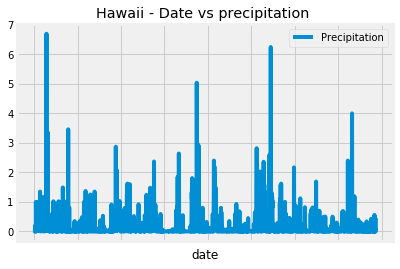

In [22]:
#Plot data from the dataframe using the pandas line plot.
##plt.savefig("/Images/datevsprecip_vsk.png")
precip_data_df1.plot(x="date",y="Precipitation",kind="line",ax=None,legend=True,
                     title="Hawaii - Date vs precipitation ")

plt.savefig("Images\datevsprecip_vsk.png")
plt.show()

In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_data_df2=precip_data_df1[["date","Precipitation"]]
precip_data_df2.describe()

,Precipitation
count,1968.000000
mean,0.171479
std,0.451817
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [23]:
# Rotate the xticks for the dates


In [25]:
# How many stations are available in this dataset? Calculation number of stations in the station table. 
#precip_data_stations = precip_data_df1["station"].unique()
#precip_data_stations
station_data = session.query(Station.station).distinct().all()
                   
#print a few rows form the query results. 
cnt=0
for row in station_data:
    print(row.station)
    cnt+=1
    if cnt > 10:
        break

type(station_data)

USC00519397
USC00513117
USC00514830
USC00517948
USC00518838
USC00519523
USC00519281
USC00511918
USC00516128


list

In [26]:
# How many stations are available in this dataset?. Calculating # of stations in the full measurement table.
station_cnt = session.query(Measurement.station).distinct().count()
station_cnt

9

In [27]:
station_list = session.query(Measurement.station).distinct().all()
#station_list

In [28]:
#from sqlalchemy import desc

In [29]:
## Query to determine what are the most active stations..
# List the stations and the counts in descending order.
station_cnts_desc = session.query(Measurement.station,func.count(Measurement.station).label("scount")).\
                    group_by(Measurement.station).\
                    order_by(desc("scount")).\
                    all()
station_cnts_desc          

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
#Determine station with highest observations and assign values for highest count to variables for use. 
(station_max , count_max) = station_cnts_desc[0]
print(station_max,count_max)

USC00519281 2772


In [32]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

station_temp_stats = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                     filter(Measurement.station == station_max).\
                     all()
station_temp_stats

[(54.0, 85.0, 71.66378066378067)]

In [31]:
#Review value of dateprevyr.
print(dateprevyr)

2016-08-31 00:00:00


In [33]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
from sqlalchemy import desc
station_temp_cnts = session.query(Measurement.station,func.count(Measurement.tobs).label("count_tobs")).\
                     filter(Measurement.date > dateprevyr).\
                     group_by(Measurement.station).\
                     order_by(desc("count_tobs")).\
                     all()
station_temp_cnts


[('USC00519397', 352),
 ('USC00519281', 343),
 ('USC00516128', 341),
 ('USC00513117', 334),
 ('USC00519523', 328),
 ('USC00514830', 297),
 ('USC00517948', 176)]

In [34]:
# Choose the station with the highest number of temperature observations.
(station_maxobs, station_maxcnt) = station_temp_cnts[0]
print(station_maxobs,station_maxcnt)

USC00519397 352


In [85]:
# Query the last 12 months of temperature observation data for this station.
# Filter by the station with the highest number of observation and plot the results as a histogram.
station_temps = session.query(Measurement.tobs).\
                     filter(Measurement.date > dateprevyr).\
                     filter(Measurement.station ==  station_maxobs).\
                     all()
station_temps[0:5]



[(81.0), (80.0), (79.0), (75.0), (79.0)]

In [86]:
#Create a  lists for the temperatures. Will be used later to convert to dataframe and plot. 
temp_list=list()
frequency=list()
cntrows=0
for row in station_temps:
    cntrows+=1
    temp, = row
    temp_list.append(temp)

print(str(len(temp_list)))

352


In [37]:
##Create temperature bins.
#bins=[]
binstemp = [60.0,62.5,65.0,67.5,70.0,72.5,75.0,77.5,80.0,82.5,85.0,87.5,90.0]
labelstemp= [60.0,62.5,65.0,67.5,70.0,72.5,75.0,77.5,80.0,82.5,85.0,87.5,90.0]

temp_freq_dict={"Temperature":temp_list }
temp_freq_df=pd.DataFrame(temp_freq_dict)

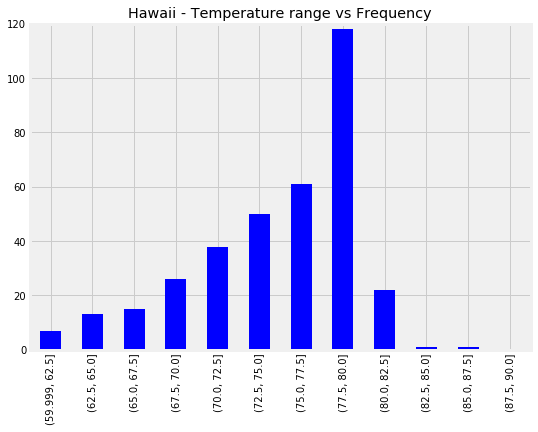

In [84]:
#Plot results as a higtogram with bins=12.
binstemp = [60.0,62.5,65.0,67.5,70.0,72.5,75.0,77.5,80.0,82.5,85.0,87.5,90.0]
out = pd.cut(temp_freq_df["Temperature"], bins=binstemp, include_lowest=True)
#ax = out.value_counts(sort=False).plot.bar(rot=0,color="b",figsize=(8,6))
ax = out.value_counts(sort=False).plot.bar(rot=0,color="b",figsize=(8,6))
#ax.set_xticklabels([c[1:-1].replace(","," to") for c in out.cat.categories])
plt.xticks(rotation='vertical')
plt.ylim(0,120)
plt.savefig("Images\Temperature-vs-Frequency.png")
plt.title("Hawaii - Temperature range vs Frequency")
plt.show()

In [72]:
#print(temp_freq_df.min())
#print(temp_freq_df.max())
#temp_freq_df.head()

In [39]:
#Create temp_range using bins and pd.cut. 
#temp_freq_df["temp_range"] = pd.cut(temp_freq_df["Temperature"],bins=binstemp)


In [67]:
#Frequency = temp_freq_df["temp_range"].value_counts(sort=False)
#Frequency

In [68]:
#Plot temp range vs frequency in a bar chart. 

#temp_freq_df.plot(x="temp_range",y=temp_freq_df["temp_range"].value_counts(sort=False),
#                  kind="bar",ax=None,legend=True,
#                  title="Hawaii - Temperature range vs Frequency")
#precip_data_df1.plot(x="date",y="Precipitation",kind="line",ax=None,legend=True,
#                     title="Hawaii - Date vs precipitation ")
#plt.show()


In [74]:
#Take a copy of the temp_freq_df dataframe. 
#temp_freq_df1 = temp_freq_df.copy()
#temp_freq_df1_grp = temp_freq_df1.groupby(["temp_range"])
#temp_freq_df1_grp_cnt = temp_freq_df1_grp["Temperature"].count()

In [73]:
#temp_freq_df1_grp_cnt
#type(out)
#out

In [ ]:
#Plot data from the dataframe using the pandas bar plot.
#precip_data_df1.plot(x="date",y="Precipitation",kind="line",ax=None,legend=True,
#                     title="Hawaii - Date vs precipitation ")

In [ ]:

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
# def calc_temps(start_date, end_date):
#     """TMIN, TAVG, and TMAX for a list of dates.
    
#     Args:
#         start_date (string): A date string in the format %Y-%m-%d
#         end_date (string): A date string in the format %Y-%m-%d
        
#     Returns:
#         TMIN, TAVE, and TMAX
#     """
    
#     return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
#         filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
# print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

# def daily_normals(date):
#     """Daily Normals.
    
#     Args:
#         date (str): A date string in the format '%m-%d'
        
#     Returns:
#         A list of tuples containing the daily normals, tmin, tavg, and tmax
    
#     """
    
#     sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
#     return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
# daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
